In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [104]:
all_studies = pd.read_csv("data/allIds__allTech_in_pub_from_run_2023-06-18.csv")
all_studies = all_studies.groupby("id", as_index=False)['all_pred_tech'].agg({'all_pred_tech':lambda x: list(x)})
all_studies["all_tech"] = all_studies.all_pred_tech.apply(lambda x: ', '.join(x))
all_studies["len"] = all_studies["all_pred_tech"].apply(len)
all_studies["all_tech"] = all_studies.all_tech.str.replace(
    "AR","Afforestation/Reforestation").str.replace(
    "restoration","Restoration").str.replace(
    "CDR/NET","CDR")

In [105]:
df1 = pd.DataFrame(all_studies.loc[all_studies["len"]==1].all_tech.value_counts()[:20])
df2 = pd.DataFrame(all_studies.loc[all_studies["len"]>1].all_tech.value_counts()[:10])

df = pd.concat([df1,df2])

In [102]:
df

,count
all_tech,


In [69]:
# biochar = 13,697
#df.iloc[0] = 3697

In [89]:
list(reversed(df.index.tolist()))

['restoration of landscapes/peats, Agroforestry, AR, Soil Carbon Sequestration',
 'Enhanced Weathering (land based), Soil Carbon Sequestration',
 'Agroforestry, AR, General Literature on CDR/NET',
 'restoration of landscapes/peats, Soil Carbon Sequestration',
 'Forest Management, Agroforestry, AR, Soil Carbon Sequestration',
 'AR, Soil Carbon Sequestration',
 'Forest Management, Agroforestry, AR',
 'Agroforestry, AR, Soil Carbon Sequestration',
 'Agroforestry, AR',
 'Biochar, Soil Carbon Sequestration',
 'Agroforestry',
 'Ocean alkalinity enhancement',
 'Enhanced Weathering (land based)',
 'AR',
 'Forest Management',
 'Ocean fertilization & Artificial upwelling',
 'General Literature on CDR/NET',
 'restoration of landscapes/peats',
 'DAC(CS)',
 'BECCS',
 'Blue Carbon',
 'Soil Carbon Sequestration',
 'Biochar']

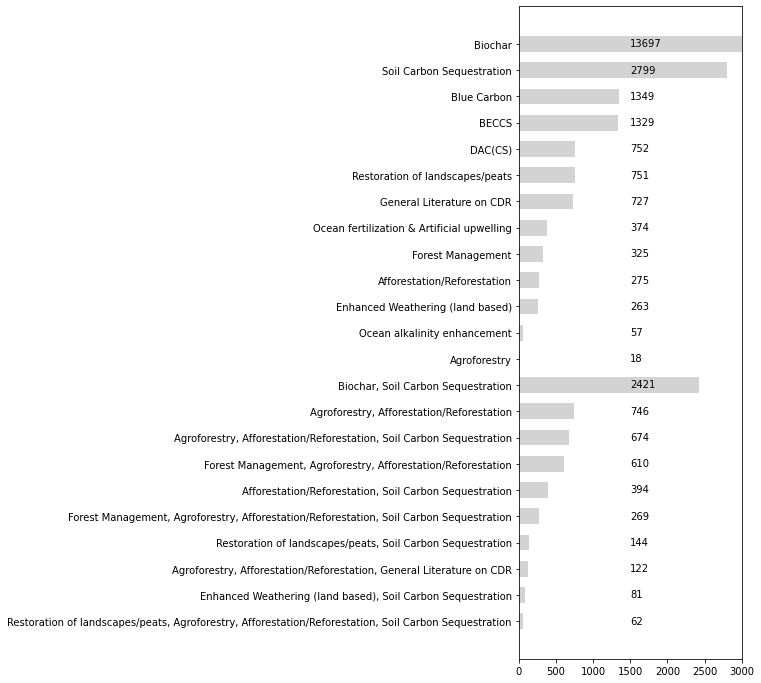

In [106]:
fig, ax = plt.subplots(figsize=(4,12))
ax.barh([i for i in range(len(df))], df["count"][::-1], 
              0.6,
              color='lightgrey')
ax.set_xlim(0,3000)
_=ax.set_yticks([i for i in range(len(df))],list(reversed(df.index.tolist())))
for i, tech in enumerate(list(reversed(df.index.tolist()))):
    ax.text(1500,i-0.1,s=list(reversed(df["count"]))[i])
fig.savefig("figures/double_counting.png", bbox_inches="tight", facecolor='white', edgecolor='none')